- #### Planteamiento del problema:
¿Cúales son las características o aspectos que influyen en el precio de alquiler de los inmuebles?

Se importan los datos y se ven caracteristicas iniciales

In [75]:
import pandas as pd

datos = pd.read_csv("https://raw.githubusercontent.com/josedrosales/EDA/main/data/raw/AB_NYC_2019.csv")

print(datos.shape)
print()
print(datos.info())
print()
datos.head(2)

(48895, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


Inicialmente podemos notar que:

- Existen 48895 inmuebles considerados y 16 variables o clases para cada una de ellos, 

  entre estos el precio (clase a predecir), el resto son 11 clases predictoras.

- La presencia de 16 valores nulos para la clase "name" es irrelevante, pues no tiene relación 

  con el precio del inmueble. Caso similar para los 21 valores nulos de la clase "host_name".

- Para los casos de las clases last_review y reviews_per_month hay 10052 datos nulos.

- El resto de variables cuentan siempre con datos.

- El conjunto de datos contiene 7 variables categóricas (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type).

- El conjunto de datos contiene 9 variables numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365).


- #### Se verifica si existen datos duplicados

In [76]:
duplicados = datos['id'].duplicated().sum()

if duplicados > 0:

    print(f'Existen {duplicados} datos duplicados.')

else:

    print(f'No existen datos duplicados, el número de duplicados es {duplicados}.')

No existen datos duplicados, el número de duplicados es 0.


In [77]:
rango_latitud = datos.latitude.max() - datos.latitude.min()
rango_longitud = datos.longitude.max() - datos.longitude.min()
print(f'Rango de la latitud es: {round(rango_latitud,4)}')
print(f'Rango de la longitud es: {round(rango_longitud,4)}')

Rango de la latitud es: 0.4133
Rango de la longitud es: 0.5314


- #### Eliminar informacion irrelevante
Clases:

- "id, name, host_id, host_name": son irrelevantes para la determinacion del precio de alquiler.
- Al estar dentro de un mismo estado los rangos de "latitud" y "longitud" son reducidos, lo cual limita su uso para análisis. Además resultan clases redundantes, ya que alternativamente se cuenta con las clases de "neighbourhood_group" y "neighbourhood".
- Las clases "last_review" y "reviews_per_month" son redundantes entre sí, nos quedaremos con "reviews_per_month". Ambas tienen la    misma cantidad de valores nulos.

In [78]:
datos.drop(['id','name','host_id','host_name','latitude','longitude','last_review'], axis=1, inplace=True)
print(datos.shape)
print()
print(datos.info())
print()
datos.head(2)

(48895, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB
None



,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355


- ### Análisis de variables univariante

#### Para variables categoricas: neighbourhood_group, neighbourhood y room_type.

#### Neighbourhood group

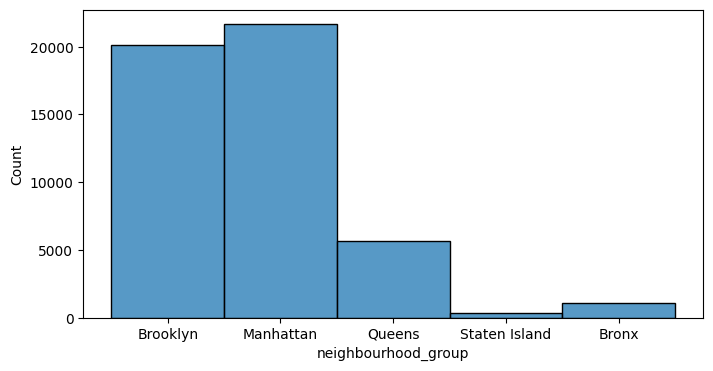

In [88]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize = (8, 4))
sns.histplot(data=datos, x="neighbourhood_group")
plt.show()

Se observa que Brooklyn y Manhattan se encuentran alrededor del mismo orden en cantidad de inmuebles para alquiler (aprox. 20K). Ambos cuadruplican la cantidad de inmuebles en Queens.

Bronx duplica la cantidad de inmuebles en Staten Island. Aunque ambos son menos del 10% que los inmuebles en Brooklyn o Manhattan.

#### Neighbourhood

221
0    Williamsburg
Name: neighbourhood, dtype: object


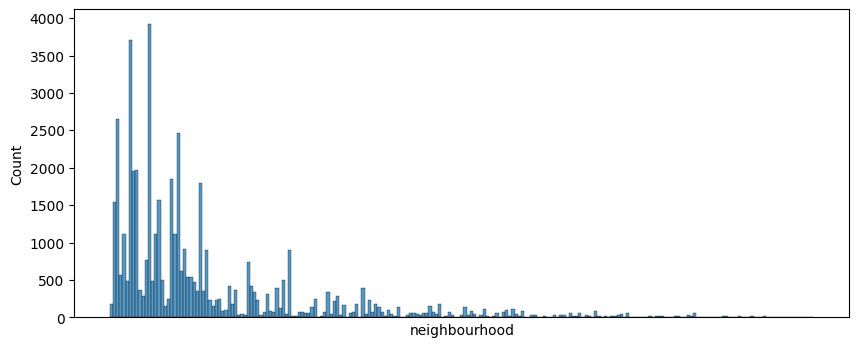

In [89]:
print(datos['neighbourhood'].nunique())
print(datos.neighbourhood.mode())
plt.figure(figsize=(10, 4))
sns.histplot(data=datos, x="neighbourhood").set_xticks([])
plt.show()


El vecindario con más ofertas es Williamsburg. Más de la mitad de los vecindarios, tienen menos de 500 ofertas disponibles.

Ahora se analiza/visualiza para vecindarios con más de 500 ofertas.

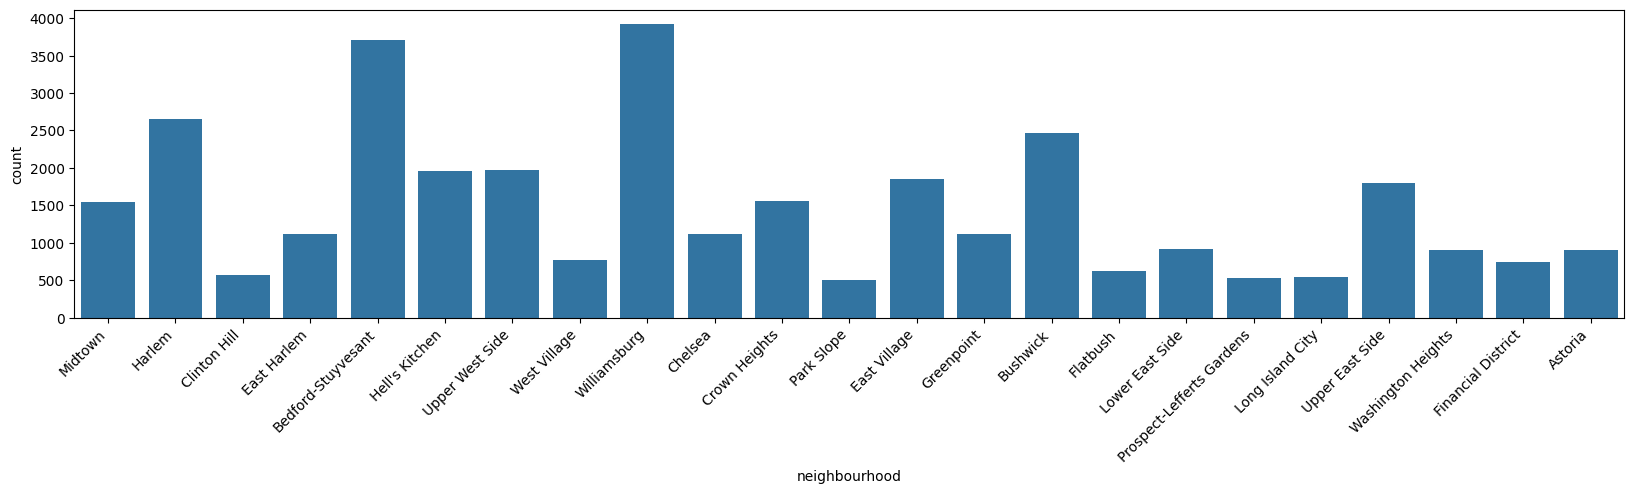

In [90]:
cuenta_valores = datos.neighbourhood.value_counts()
valores_500 = cuenta_valores[cuenta_valores > 500].index
datos_filtrados = datos[datos['neighbourhood'].isin(valores_500)]
plt.figure(figsize=(20, 4))
sns.countplot(data=datos_filtrados, x="neighbourhood")
plt.xticks(rotation=45, ha="right")
plt.show()


#### Room type

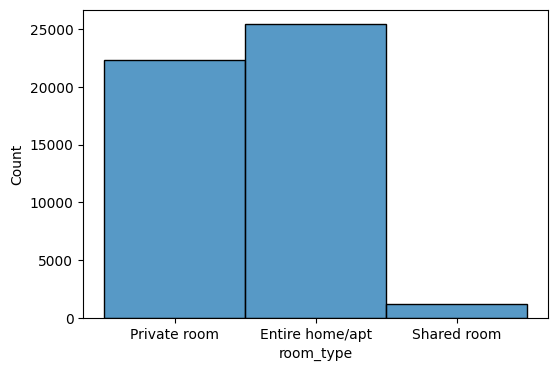

In [91]:
plt.figure(figsize = (6, 4))
sns.histplot(data=datos, x="room_type")
plt.show()

In [92]:
conteo_valor_especifico = datos['room_type'].value_counts().get('Shared room', 0)
print(conteo_valor_especifico)

1160


La mayor cantidad de ofertas es para casas o apartamentos completos, le sigue cuartos privados.
La oferta de cuartos compartidos es menor al 10% de la oferta para cada uno de los otros grupos.

#### Para variables numéricas: price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspa

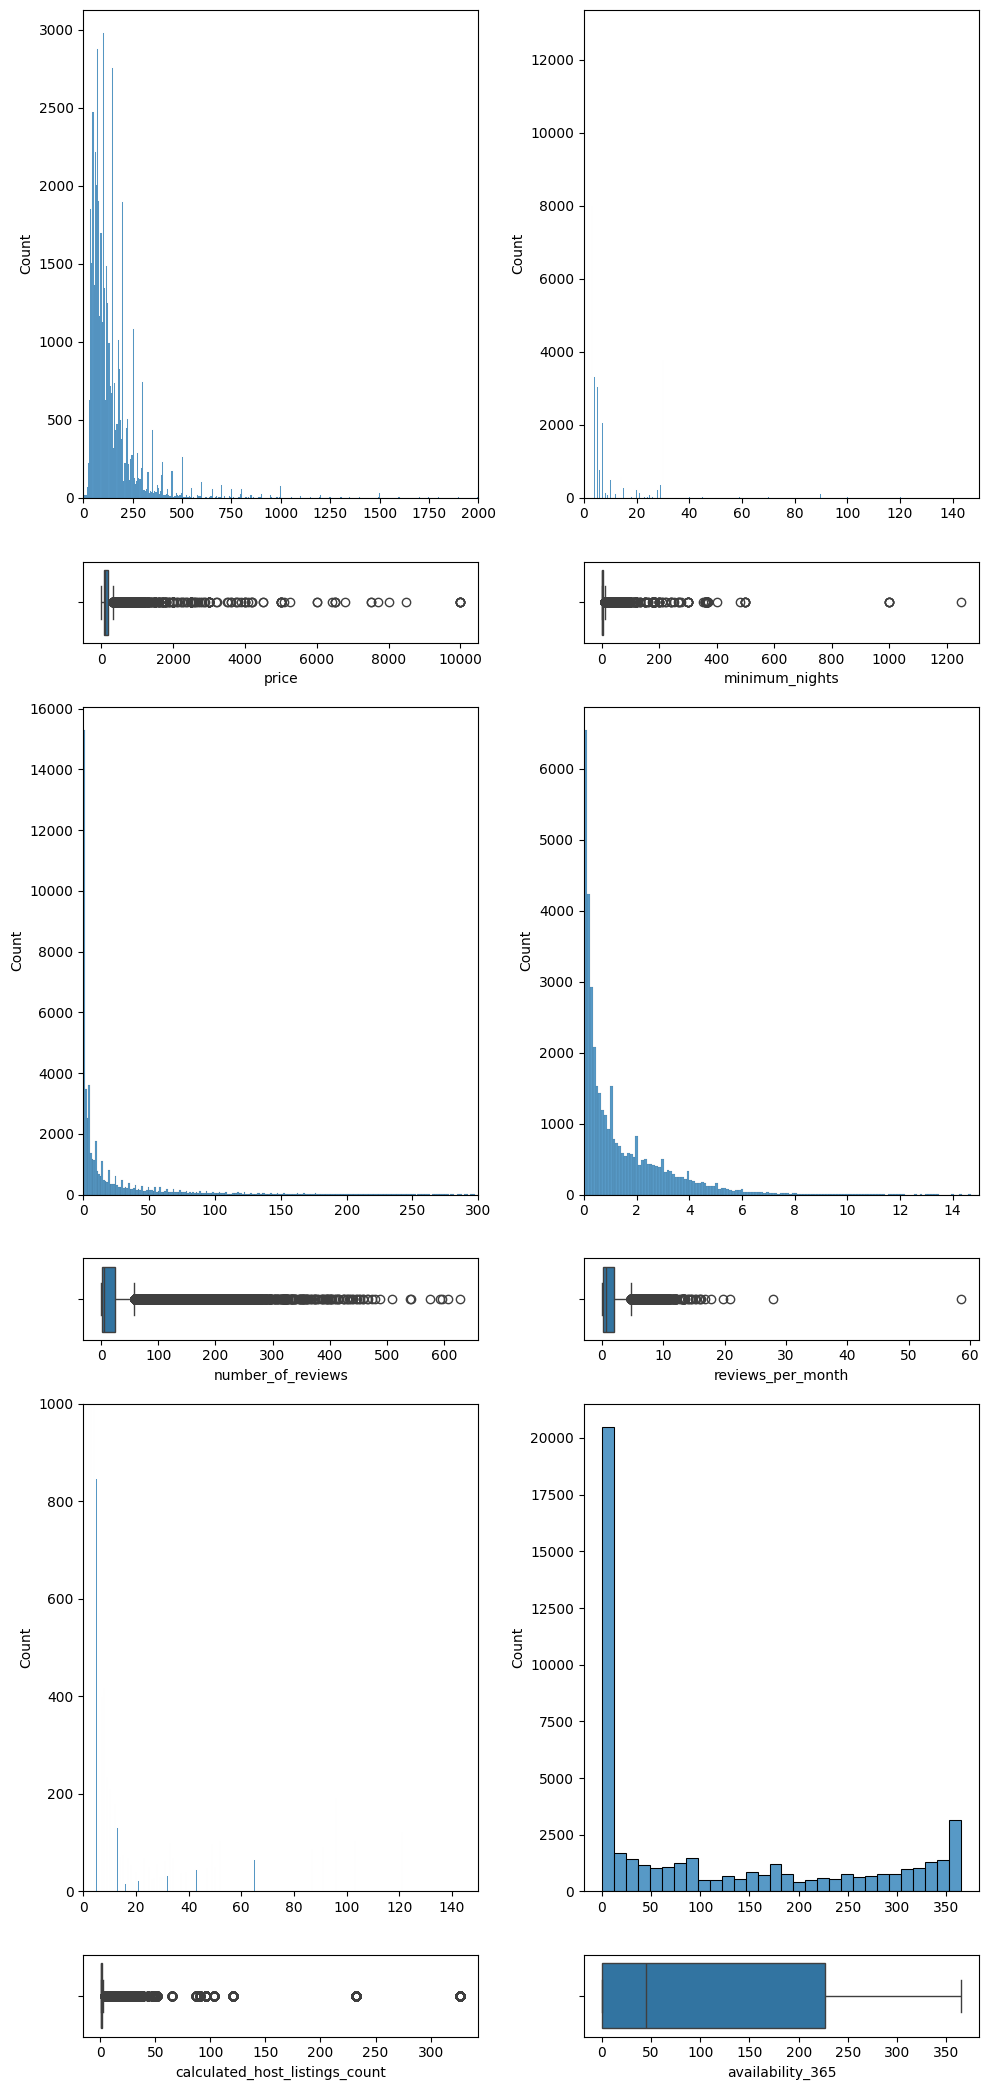

In [93]:
fig, axis = plt.subplots(6, 2, figsize = (10, 21), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = datos, x = "price").set(xlabel = None)
axis[0, 0].set_xlim(0, 2000)
sns.boxplot(ax = axis[1, 0], data = datos, x = "price")

sns.histplot(ax=axis[0, 1], data=datos, x="minimum_nights").set(xlabel=None)
axis[0, 1].set_xlim(0, 150)
sns.boxplot(ax = axis[1, 1], data = datos, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = datos, x = "number_of_reviews").set(xlabel = None)
axis[2, 0].set_xlim(0, 300)
sns.boxplot(ax = axis[3, 0], data = datos, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = datos, x = "reviews_per_month").set(xlabel = None)
axis[2, 1].set_xlim(0, 15)
sns.boxplot(ax = axis[3, 1], data = datos, x = "reviews_per_month")

sns.histplot(ax = axis[4, 0], data = datos, x = "calculated_host_listings_count").set(xlabel = None)
axis[4, 0].set_xlim(0, 150)
axis[4, 0].set_ylim(0, 1000)
sns.boxplot(ax = axis[5, 0], data = datos, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4, 1], data = datos, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = datos, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [94]:
conteo_valor_especifico = (datos['availability_365'] == 0).sum()
proporcion_valor_especifico = conteo_valor_especifico / len(datos)
print(proporcion_valor_especifico)

0.35858472236424993


- La mayoría de los precios están entre 0-250$
- La mayoría exigen menos de 10 noches mínimas de hospedaje.
- La mayoría poseen menos de 50 reviews y menos de 2 reviews por mes.
- Existe gran cantidad de datos faltantes en calculated_host_listings_count, y la mayoría es un números menos a 10.
- Alrededor de 36% de las ofertas tienen cero como dias disponibles, lo cual parece ser un error.
- Todas las variables presentan datos atípicos excepto la availability_365.

- ### Análisis de variables multivariante

#### Numérico-numérico

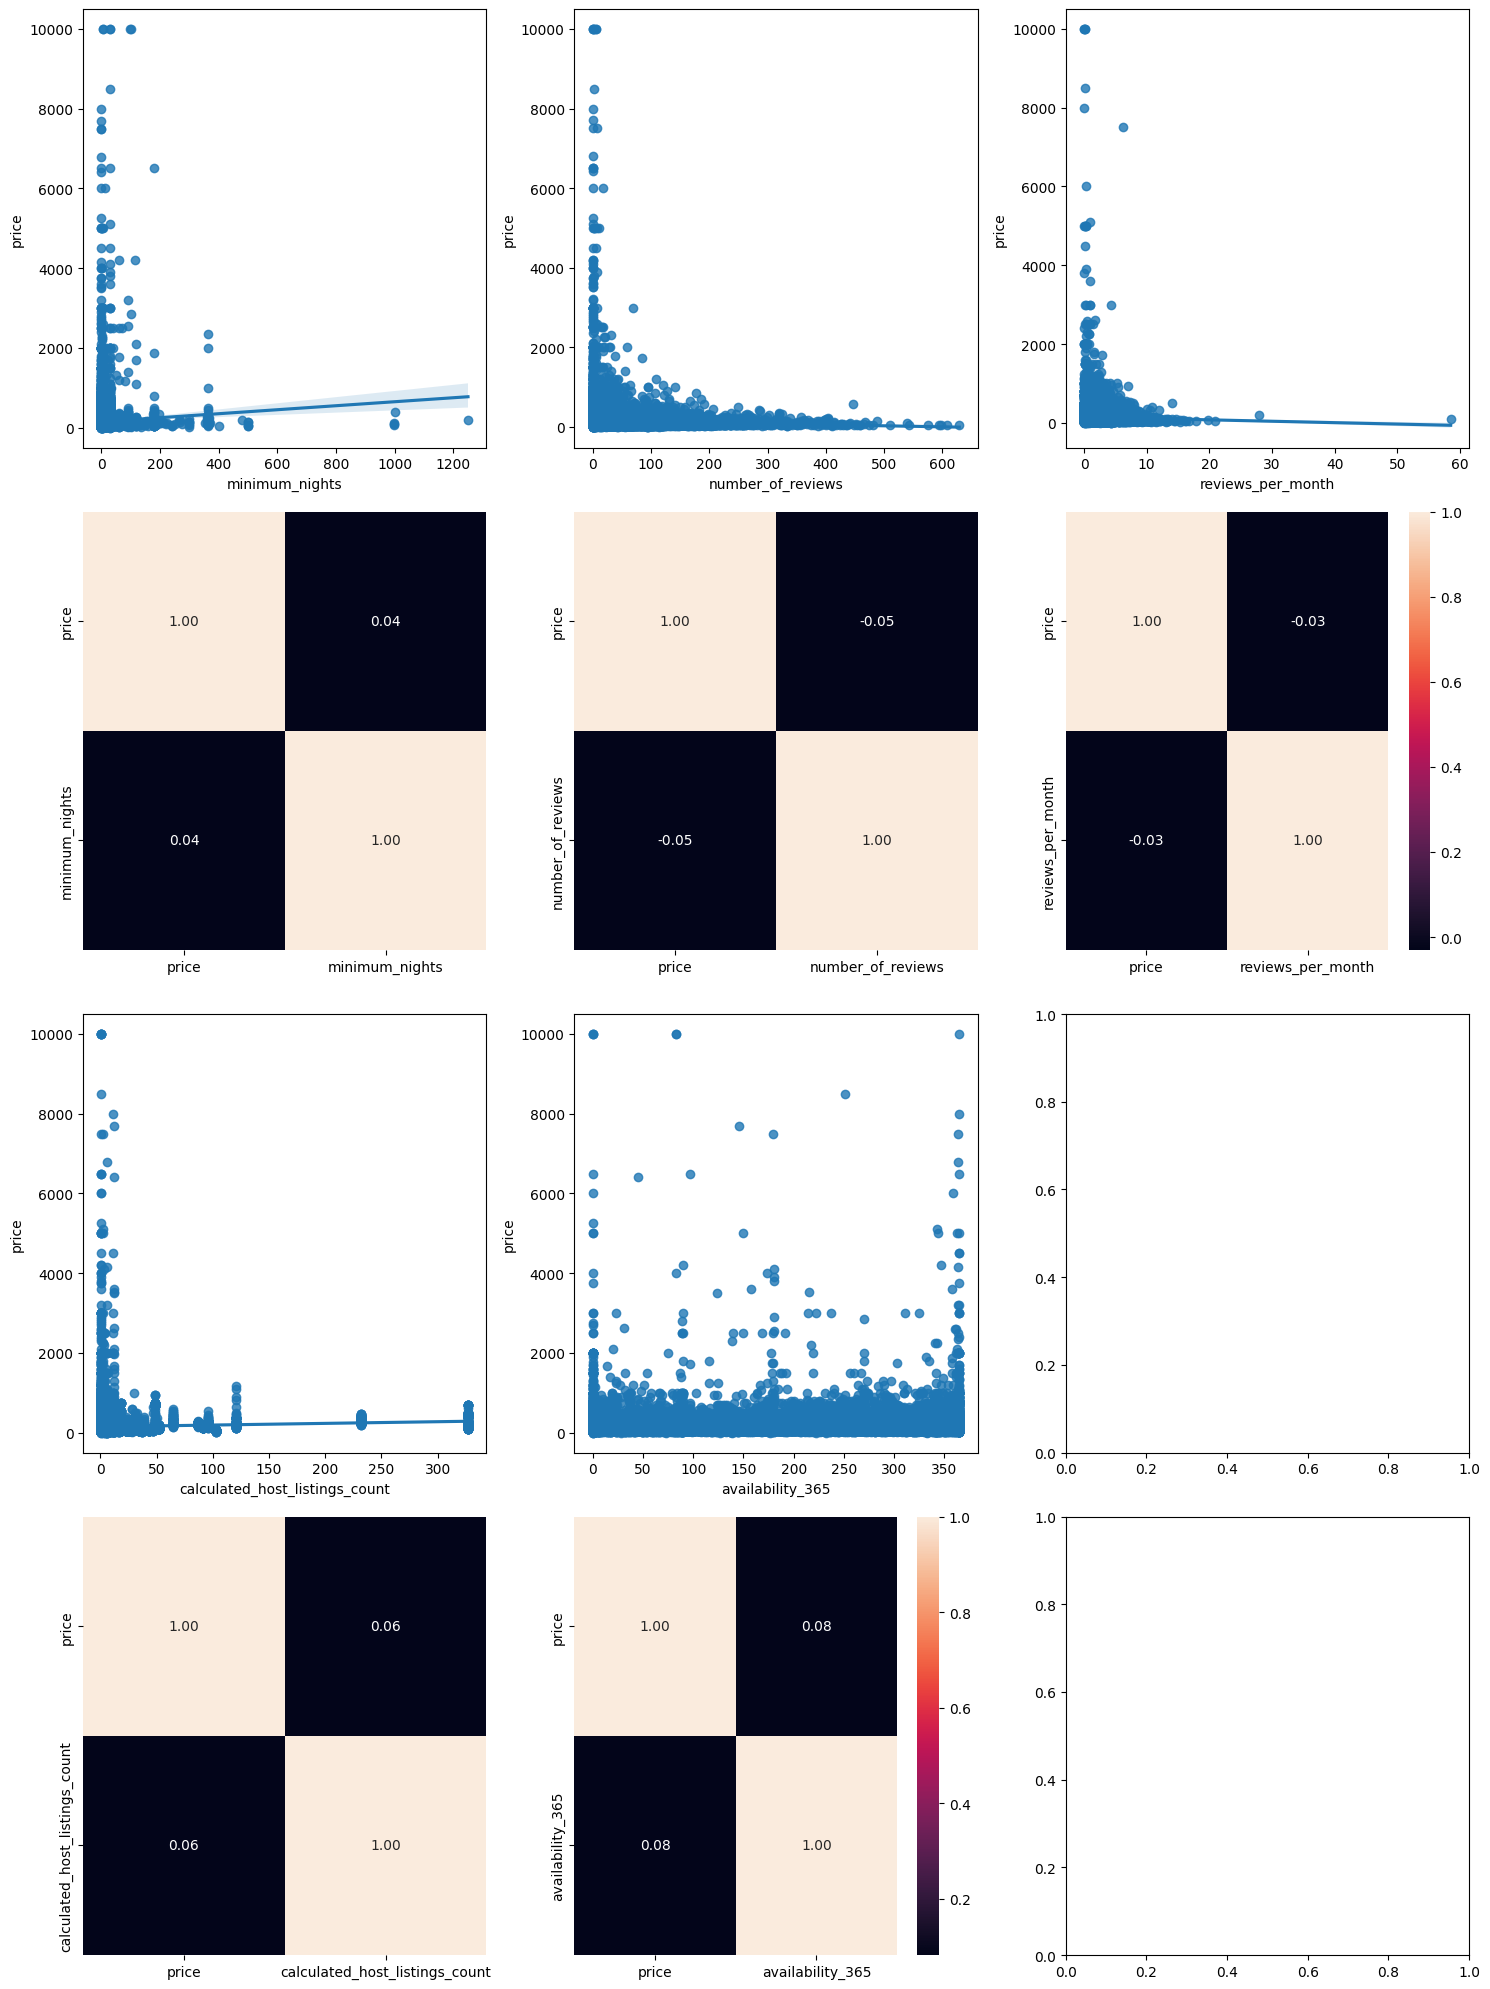

In [95]:
fig, axis = plt.subplots(4,3, figsize = (15, 20))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0,0], data = datos, x = "minimum_nights", y = "price")
sns.heatmap(datos[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = datos, x = "number_of_reviews", y = "price")
sns.heatmap(datos[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

sns.regplot(ax = axis[0,2], data = datos, x = "reviews_per_month", y = "price")
sns.heatmap(datos[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])

sns.regplot(ax = axis[2,0], data = datos, x = "calculated_host_listings_count", y = "price")
sns.heatmap(datos[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0], cbar = False)

sns.regplot(ax = axis[2,1], data = datos, x = "availability_365", y = "price")
sns.heatmap(datos[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1])

plt.tight_layout()
# Mostrar el plot
plt.show()

En ninguno de los casos existe una relación de significancia importante, entre la variable considerada y el precio del alquiler.

Análisis entre dichas variables.

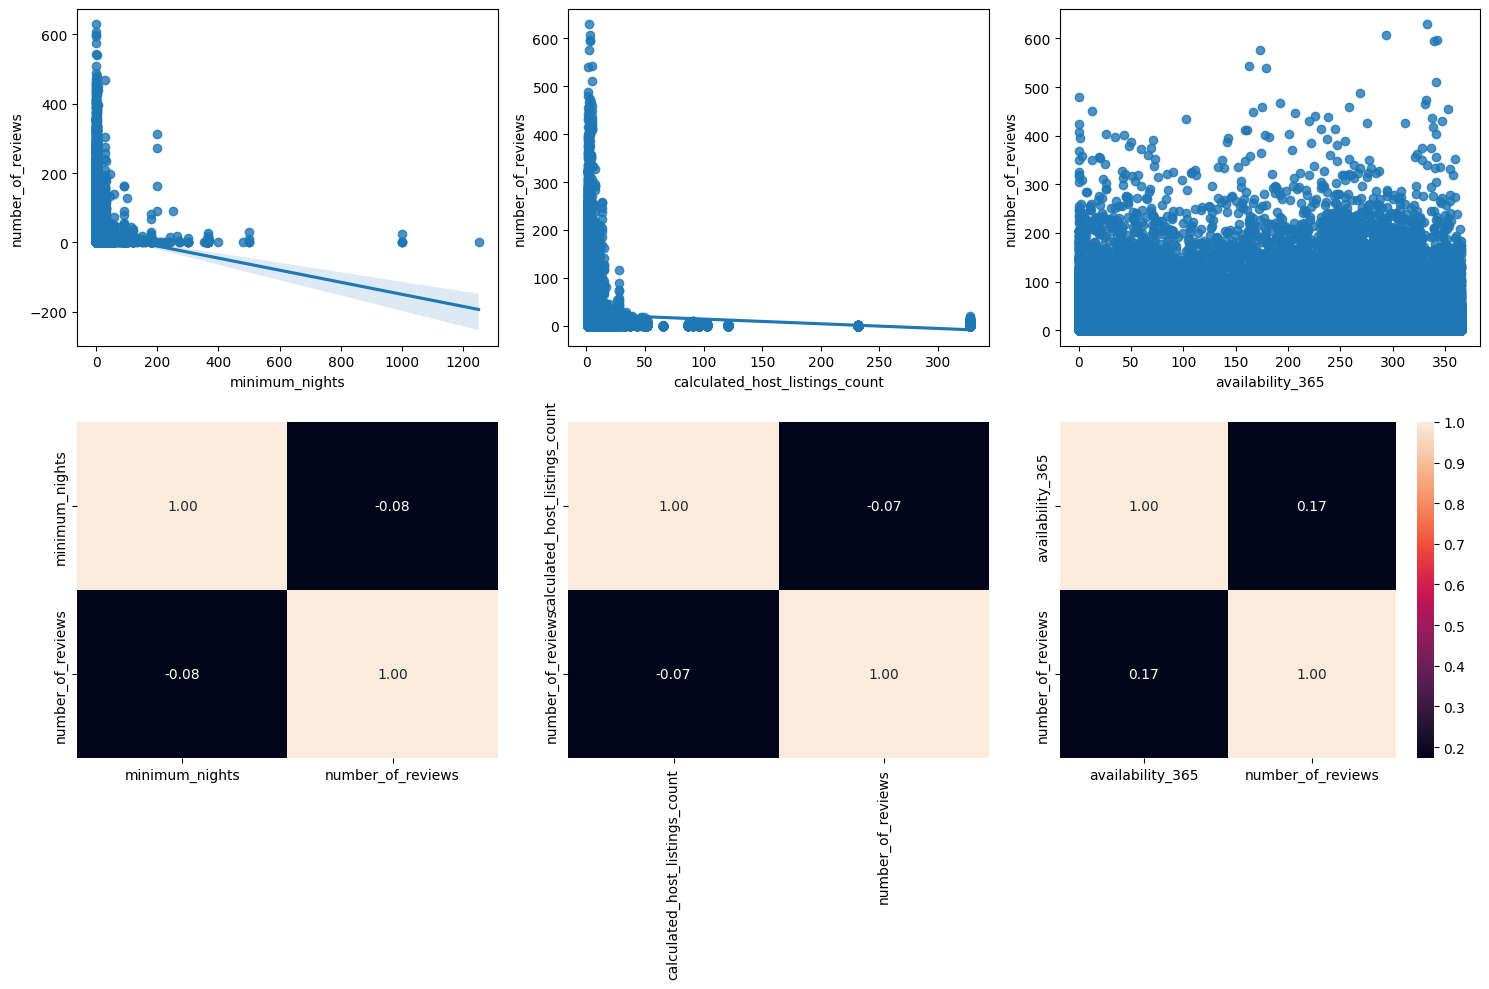

In [96]:
fig, axis = plt.subplots(2,3, figsize = (15, 10))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0,0], data = datos, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(datos[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = datos, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.heatmap(datos[["calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

sns.regplot(ax = axis[0,2], data = datos, x = "availability_365", y = "number_of_reviews")
sns.heatmap(datos[["availability_365", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])

plt.tight_layout()
# Mostrar el plot
plt.show()

Existe una relación directa aunque débil, entre la cantidad de días disponibles por año y el número de reviews, lo cual es totalmente esperable.